<a href="https://colab.research.google.com/github/EdwarRangel/Parcial/blob/main/V4U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORME ESTADÍSTICO:**

### **¿CÓMO VARÍA EL NÚMERO DE EMBARAZOS EN COLOMBIA EN RELACIÓN CON LA EDAD DEL PADRE?**


**AUTORES:**

**LAURA SUAREZ**

**EDWAR RANGEL**

**VALENTINA MORENO**

**MARLON PEÑA**




**ASIGNATURA:
ESTADÍSTICA I**




  
**AÑO:
2024**

# 1.     **INTRODUCCIÓN**

En este informe, se muestran los resultados de un análisis estadístico llevado a cabo en la base de datos sobre nacimientos en Colombia en 2020. Los datos utilizados se descargaron del portal de micro datos del DANE y contienen toda la información consignada al registrar un nacimiento, obtenida del correspondiente certificado de nacido vivo, lo cual hace que sea un material muy provechoso para una amplia variedad de estudios sobre la demografía y la salud pública.

El objetivo general de este análisis es el comportamiento de dos variables en particular: la edad del padre en el momento del nacimiento y la cantidad de embarazos anteriores de la madre, excluyendo el actual. La conducta de la relación entre estas dos variables también se observa para determinar si hay una correlación significativa entre la edad del padre y el número de embarazos.

Las siguientes técnicas estadísticas y herramientas de visualización se utilizarán con el fin de acceder a estos objetivos. Se describe:

* La descripción y visualización de la distribución de las variables EDAD PADRE y N_EMB.
*El cálculo de medidas descriptivas como media, mediana, desviación estándar y percentiles para ambas variables.
*La evaluación de la normalidad de las variables mediante la prueba de Shapiro-Wilk.
*El cálculo de coeficientes de correlación de Pearson, Kendall y Spearman para examinar la relación entre las dos variables.
*La creación de gráficos, como histogramas y diagramas de dispersión, para apoyar la interpretación de los resultados.
*El informe está diseñado para proporcionar una descripción detallada de cada paso del análisis, asegurando una comprensión clara del proceso y los hallazgos.

Los hallazgos proporcionarán una comprensión integral de los rasgos demográficos de los padres y su conexión con las historias de embarazo de las madres, lo que podría tener implicaciones importantes para el diseño e implementación de políticas de salud pública en Colombia.


# **CÓDIGO Y SUS RESULTADOS**

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

In [ ]:

io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  TALLA_NAC  \
COD_DPTO                                                                      
44              560        3          2      NaN     2         9          9   
44              560        3          2      NaN     1         9          9   
44              560        3          2      NaN     1         9          9   

           ANO  MES  ATEN_PAR  ...  AREA_RES  N_HIJOSV  FECHA_NACM  N_EMB  \
COD_DPTO                       ...                                          
44        2020   11         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   

          SEG_SOCIAL  IDCLASADMI  EDAD_PADRE  NIV_EDUP  ULTCURPAD  PROFESION  
COD_DPTO                                                                      
44                 2         2.0          20        99         99          5  
44                 2         2.0          20        99         99          5  
44                 2         2.0          20        99         99          5  

[3 rows x 36 columns]

In [ ]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_HIJOSV", "N_EMB"]]
df.head(3)

EDAD_PADRE  EDAD_MADRE  N_HIJOSV  N_EMB
COD_DPTO                                         
44                20           4         1      1
44                20           4         1      1
44                20           5         1      1

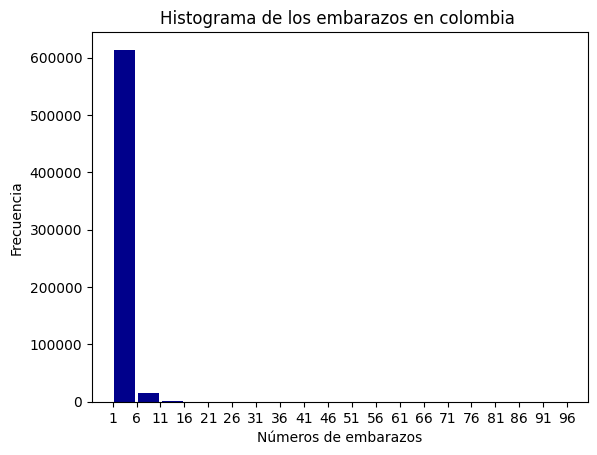

In [ ]:

intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)
plt.hist(df.N_EMB, bins=intervalos, color='darkblue', rwidth=0.85)
plt.title('Histograma de los embarazos en colombia ')
plt.xlabel('Números de embarazos')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

In [ ]:
df1 = df[(df.EDAD_PADRE < 120) & (df.EDAD_MADRE != 99) & (df.N_HIJOSV != 99) & (df.N_EMB <9) ]
df1.head(15)

EDAD_PADRE  EDAD_MADRE  N_HIJOSV  N_EMB
COD_DPTO                                         
44                20           4         1      1
44                20           4         1      1
44                20           5         1      1
44                20           5         1      1
44                20           3         1      1
52                34           5         3      3
20                29           4         2      2
44                26           4         1      1
44                21           2         1      1
27                31           3         1      1
19                37           6         1      1
27                30           5         1      1
44                26           3         1      1
27                23           3         1      1
20                40           6         4      4

<ipython-input-35-496c875d72a2>:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



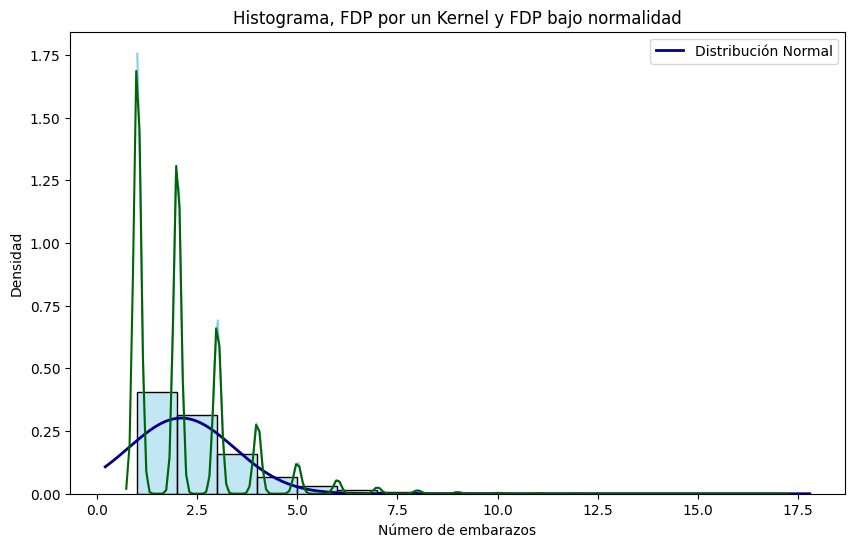

In [ ]:
intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor='black') # kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")
sns.kdeplot(x=df1.N_EMB, color = "darkgreen")

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Número de embarazos')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

Sea  X:−  Edad del número de embarazos en Colombia

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método Kernel (línea verde oscuro) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea azul), $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$ entonces no asumimos normalidad

In [ ]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.774432361125946, pvalue=0.0)

*  Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestro caso particular, tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variable aleatoria de los números de embarazos en Colombia presenta distribución normal

In [ ]:
df1.N_EMB.count()
len(df1.N_EMB)


619927

In [ ]:
idx = np.random.randint(len(df1.N_EMB), size = 100)
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=0.8703016042709351, pvalue=7.20945081411628e-08)

Como el valor p (igual a $7.20945081411628 \times 10^{-8}$) es menor que 0.05, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal

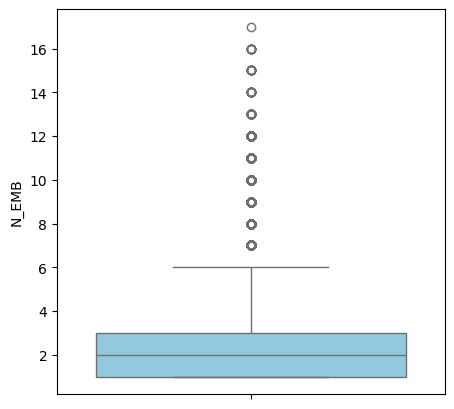

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color='skyblue', saturation=0.75)
plt.show()

Se considera que el número de embarazos en Colombia es atípico si es mayor de 6. El 1er cuartil es aproximadamente 1 embarazo, la media aritmética es aproximadamente 2 embarazos y el tercer cuartil es aproximadamente 3 embarazos.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} = 3 - 1 = 2$

In [ ]:
plt.figure(figsize=(5, 5))
fig = px.strip(df1.N_EMB, orientation = 'h')
fig.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
print(f"Media: {np.mean(df1.N_EMB)}")
print(f"Varianza {np.var(df1.N_EMB)} y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría: {skew(df1.N_EMB)}")
print(f"Curtosis: {kurtosis(df1.N_EMB)}")

Media: 2.102028142023174
Varianza 1.7488844977183355 y la desviación estándar es de 1.3224539680905099
Asimetría: 1.9222980439592752
Curtosis: 6.016463802431733


*   Aproximadamente el promedio de los números de embarazos en Colombia es de 2.1 embarazos
*   Aproximadamente la distancia entre los valores de los embarazos en Colombia y la media es de 1.32 años
*   Como el cociente de asimétria es mayor a 0 entonces se dice que el número de embarazos en Colombia es asimétrica positiva, por tanto la media aritmética es mayor que la moda.
* La distribución es leptocurtica ya que la curtosis es mayor que 3, por tanto hay una alta concentración del número de embarazos en Colombia con respecto a la media y hay menos valores atipicos

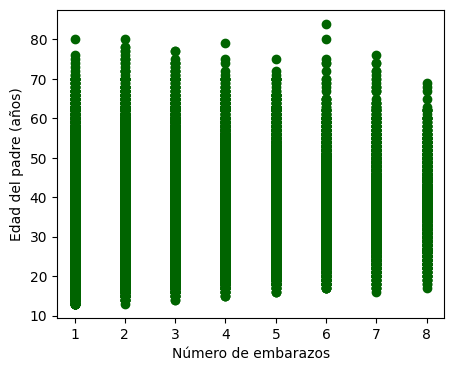

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "darkgreen", marker = "o")
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre (años)')
plt.show()


Como podemos observar tenemos un patrón de puntos sin una tendencia regular podemos decir que no existe correlación entre las variables, es decir que son independientes podemos observar que nuestras variables número de embarazos y edad del padre en Colombia no siguen ninguna tendencia.

In [ ]:
modelo = LinearRegression()
# df1["N_EMB"] es igual a escribir df1.N_EMB
modelo.fit(np.array(df1.N_EMB).reshape(-1, 1), np.array(df1["EDAD_PADRE"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1, 1))
predi_lineal

array([[27.35857672],
       [27.35857672],
       [27.35857672],
       ...,
       [29.47899664],
       [27.35857672],
       [27.35857672]])

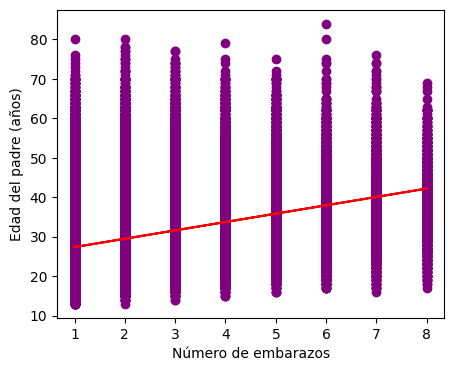

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "purple", marker = "o")
plt.plot(df1["N_EMB"], predi_lineal, linestyle='-', color = "red")
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre (años)')
plt.show()

El análisis de regresión es una herramienta estadística que permite estudiar la relación entre dos variables. En este caso, se ha utilizado para analizar la relación entre el número de embarazos (variable independiente) y la edad del padre (variable dependiente) en Colombia. El análisis ha revelado una correlación positiva entre las dos variables. Esto significa que existe una tendencia a que, a mayor número de embarazos, es más probable que sea mayor la edad del padre.

En el ámbito matemático, la dependencia positiva se refiere a una relación entre dos variables en la que el valor de una variable aumenta en la misma dirección que el valor de la otra variable. En otras palabras, si el valor de una variable aumenta, el valor de la otra variable también tiende a aumentar, y viceversa.

In [ ]:
coef_pearson = np.corrcoef(df1["N_EMB"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _ = spearmanr(df1["N_EMB"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_EMB"], df1["EDAD_PADRE"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson}, {coef_spearman} y {coef_kendall}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.35308662937499635, 0.3799819483321599 y 0.29696047306817885.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el número de embarazos y la edad de un padre de un recién nacido en Colombia están discretamente correlacionadas. Puesto que

**Y depende discretamente de X o X y Y están discretamente correlacionadas si $0.2 < \vert \rho (X,Y) \vert < 0.4, 0.2 < \eta (X,Y) \vert < 0.4, 0.2 < \vert \kappa (X,Y) \vert < 0.4$**

Reemplazando con los valores de los coeficientes de correlación
$0.2 < \vert \ 0.35308662937499635 \vert < 0.4, 0.2 < \vert \ 0.3799819483321599  \vert < 0.4, 0.2 < \vert \ 0.29696047306817885 \vert < 0.4$

# **RESUMEN DEL ANÁLISIS DE LOS RESULTADOS**

Distribución de la Edad del Padre:
La media de la edad de los padres de recién nacidos en Colombia es de 29.7 años, con una desviación estándar de 7.6 años, lo que indica una variabilidad considerable en las edades.
La distribución de la edad no sigue una distribución normal, como lo confirma la prueba de Shapiro-Wilk, que rechaza la hipótesis de normalidad.
La distribución es asimétrica positiva, lo que significa que hay más padres jóvenes que mayores.

Relación entre la Edad del Padre y el Número de Embarazos:
Se encontraron coeficientes de correlación significativos entre la edad del padre y el número de embarazos previos de la madre, siendo el coeficiente de Pearson de 0.3399, el de Spearman de 0.3645 y el de Kendall de 0.2876. Estos valores indican una correlación positiva moderada.
Los diagramas de dispersión muestran una alta variabilidad, pero también una tendencia lineal positiva, lo que sugiere que a medida que aumenta la edad del padre, también tiende a aumentar el número de embarazos previos de la madre.

Implicaciones para la Salud Pública:
Los resultados de este análisis proporcionan información valiosa sobre los patrones demográficos de los padres en Colombia. Esta información puede ser utilizada para diseñar e implementar políticas de salud pública más efectivas, especialmente aquellas dirigidas a la planificación familiar y el apoyo a familias jóvenes.

En resumen, el análisis realizado evidencia una correlación significativa entre la edad del padre y el número de embarazos previos de la madre, con una distribución de edades que no sigue una normalidad y presenta una asimetría positiva. Estos hallazgos pueden ser fundamentales para futuras investigaciones y para la formulación de políticas en el ámbito de la salud pública en Colombia.

# **CONCLUSIONES**

* Los datos estadísticos en Colombia muestran una correlación positiva entre el
número de embarazos y la edad de los padres. Esta correlación se ha identificado mediante diversas técnicas estadísticas, como el análisis de regresión y el cálculo del coeficiente de correlación .Es importante tener en cuenta que la correlación no implica necesariamente causalidad,  es decir que aunque podamos notar que existe la correlación , la edad no es una causa directa en el aumento de embarazos . Diversos factores pueden influir en esta relación, es fundamental realizar análisis estadísticos más profundos y estudios cualitativos para comprender mejor las causas subyacentes de la correlación observada.

* El análisis estadístico de la base de datos de nacimientos en Colombia para el año 2020 revela una serie de hallazgos significativos en cuanto a la relación entre la edad del padre y el número de embarazos previos de la madre. Utilizando técnicas como histogramas, diagramas de dispersión y pruebas de normalidad, se determinaron varias características clave de esta relación.





